In [1]:
library(fpp)

Loading required package: forecast
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: timeDate
This is forecast 7.1 

Loading required package: fma
Loading required package: tseries
Loading required package: expsmooth
Loading required package: lmtest


In [112]:
z = read.csv("GotZero.csv", sep=",", header=TRUE)
# use zoo to convert the date "YYYY-MM" to a date
zz <- read.zoo(z, sep=",", FUN=as.yearmon)

# us ts to convert the zoo object to ts object using the correct intervals
zero = ts(zz, frequency=12, start=c(1990,1), end=c(2004, 4))

zero = zero *0

zero = replace(zero, c(141), 1)

In [2]:
# read in the csv file
ds <- read.csv("GotAir.csv", sep=",", header=TRUE)

# use zoo to convert the date "YYYY-MM" to a date
zoo <- read.zoo(ds, sep=",", FUN=as.yearmon)

# us ts to convert the zoo object to ts object using the correct intervals
ts = ts(zoo, frequency=12, start=c(1990,1), end=c(2004, 4))

mn = list(month.abb, unique(floor(time(ts))))
df = as.data.frame(t(matrix(scale(ts), 12, dimnames = mn)))
scale = ts(c(t(df)), start=1990, end=c(2004, 4), freq=12)

Warning message in matrix(scale(ts), 12, dimnames = mn):
“data length [172] is not a sub-multiple or multiple of the number of rows [12]”

In [92]:
spend = data.frame(dummy = c(1, 172))
spend_future = data.frame(dummy = c(10173:10196))

In [96]:
# Create ts object that is mimic of fancy with 0s
spend = replace(scale, 1:length(scale), 1)

In [88]:
aa_fit = auto.arima(scale, approximation=FALSE, trace=FALSE)
summary(aa_fit)

Series: scale 
ARIMA(1,0,0)(0,1,1)[12] with drift         

Coefficients:
         ar1     sma1   drift
      0.8003  -0.6738  0.0146
s.e.  0.0476   0.0651  0.0029

sigma^2 estimated as 0.05555:  log likelihood=1.63
AIC=4.74   AICc=5   BIC=17.04

Training set error measures:
                      ME      RMSE       MAE      MPE    MAPE      MASE
Training set -0.00089592 0.2251744 0.1249888 20.61296 54.0329 0.3743914
                    ACF1
Training set -0.00339085


### future = forecast(aa_fit, 80)
plot(future, main="Air Forecast")

In [130]:
scalew = ts(c(t(df)), start=1990, end=c(2001, 8), freq=12)

In [132]:
aaw_fit = auto.arima(scalew, approximation=FALSE, trace=FALSE)
summary(aaw_fit)

Series: scalew 
ARIMA(1,1,1)(1,1,1)[12]                    

Coefficients:
         ar1      ma1     sar1     sma1
      0.5473  -0.9008  -0.2679  -0.3492
s.e.  0.1202   0.0766   0.1796   0.1825

sigma^2 estimated as 0.01836:  log likelihood=72.87
AIC=-135.74   AICc=-135.24   BIC=-121.52

Training set error measures:
                     ME      RMSE        MAE      MPE     MAPE      MASE
Training set 0.01725336 0.1270006 0.09390086 15.15513 46.24102 0.3679561
                   ACF1
Training set 0.01834423


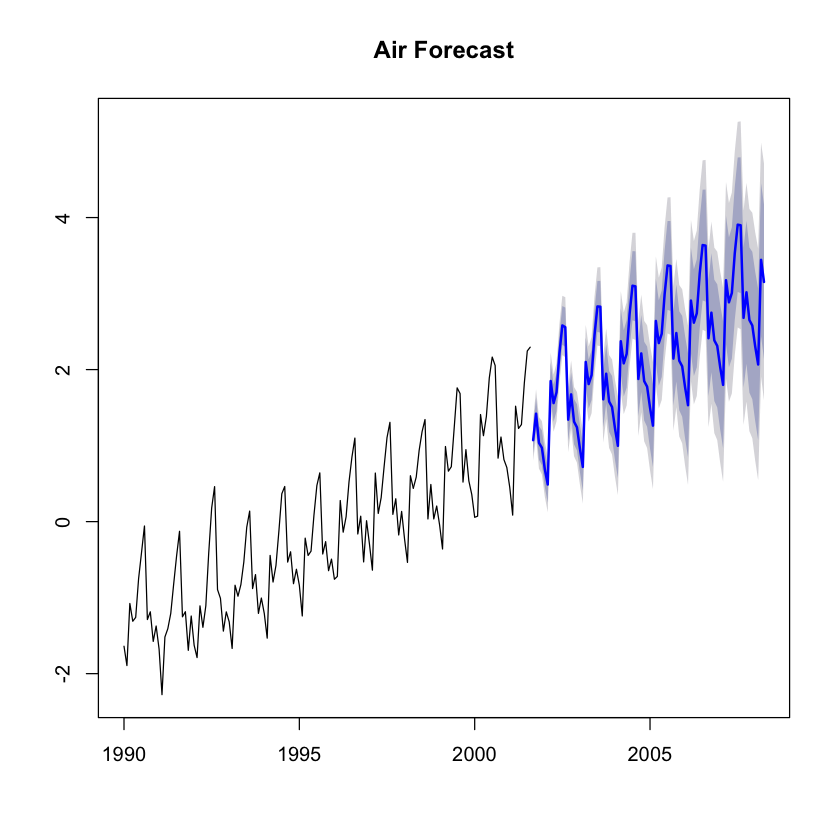

In [134]:
futurew = forecast(aaw_fit, 80)
plot(futurew, main="Air Forecast")

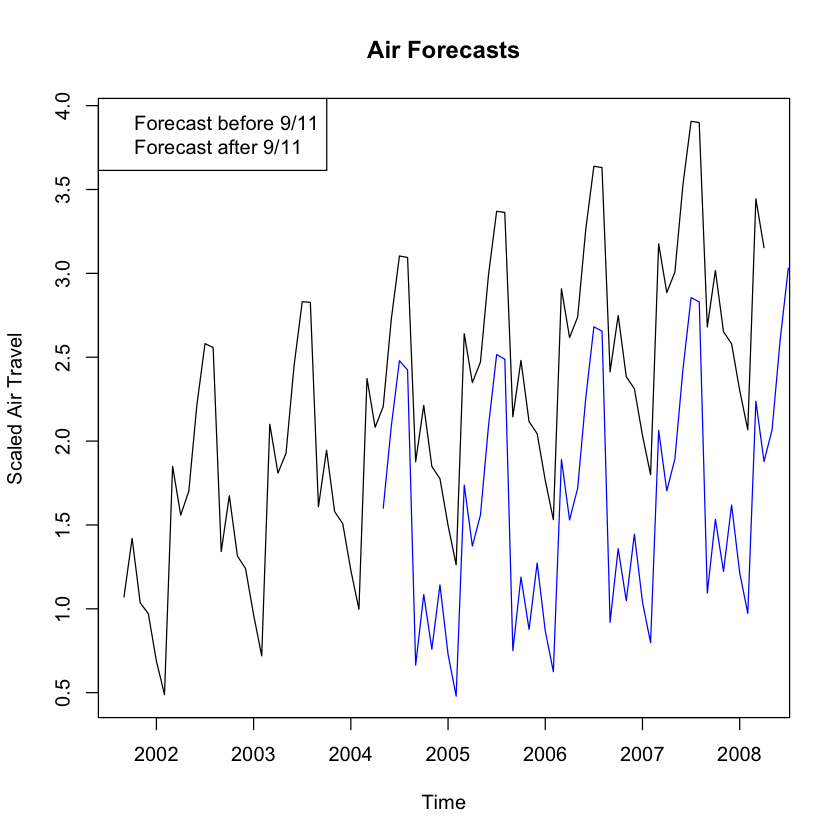

In [155]:
plot(futurew$mean, xlab= "Time", ylab="Scaled Air Travel", main="Air Forecasts")
lines(future$mean, col="blue")
legend("topleft", legend=c("Forecast before 9/11", "Forecast after 9/11"), col=c("black", "blue"))

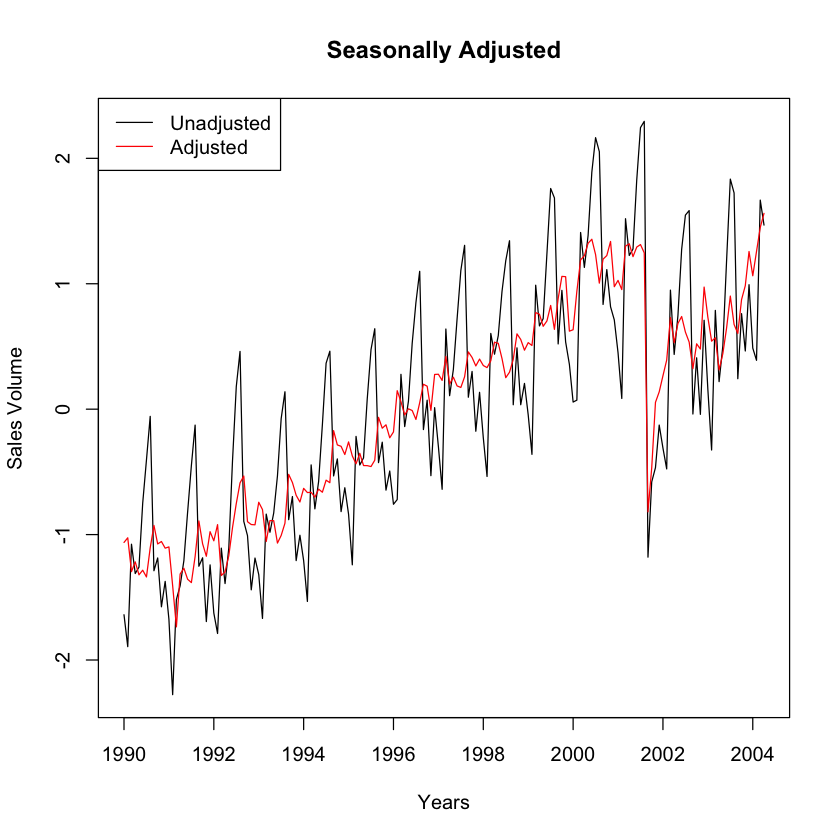

In [138]:
stl = stl(scale, s.window="periodic")
sa = seasadj(stl)

plot(scale, main="Seasonally Adjusted", ylab="Sales Volume", xlab="Years")
lines(sa, col="red")
legend("topleft", legend=c('Unadjusted', 'Adjusted'), col=c("black", "red"), lty=c(1,1))

In [142]:
class(aa_fit)

[1] "ARIMA" "Arima"

In [145]:
future$mean

           Jan       Feb       Mar       Apr       May       Jun       Jul
2004                                         1.5998540 2.0908194 2.4790913
2005 0.7291666 0.4792244 1.7377492 1.3737199 1.5593560 2.0933277 2.5160189
2006 0.8678002 0.6250972 1.8894156 1.5300231 1.7193703 2.2563120 2.6813802
2007 1.0401854 0.7979822 2.0627008 1.7036285 1.8932319 2.4303788 2.8556111
2008 1.2149014 0.9727328 2.2374789 1.8784288 2.0680499 2.6052109 3.0304546
2009 1.3897783 1.1476121 2.4123602 2.0533116 2.2429339 2.7800959 3.2053404
2010 1.5646664 1.3225004 2.5872486 2.2282001 2.4178225 2.9549845 3.3802290
           Aug       Sep       Oct       Nov       Dec
2004 2.4237704 0.6642622 1.0847769 0.7591255 1.1429116
2005 2.4882448 0.7507831 1.1889423 0.8774123 1.2725002
2006 2.6555085 0.9195693 1.3589470 1.0483922 1.4442606
2007 2.8298708 1.0940367 1.5334986 1.2230112 1.6189335
2008 3.0047233 1.2688965 1.7083643 1.3978815 1.7938075
2009 3.1796097 1.4437834 1.8832516 1.5727691 1.9686954
2010 3.3544985 

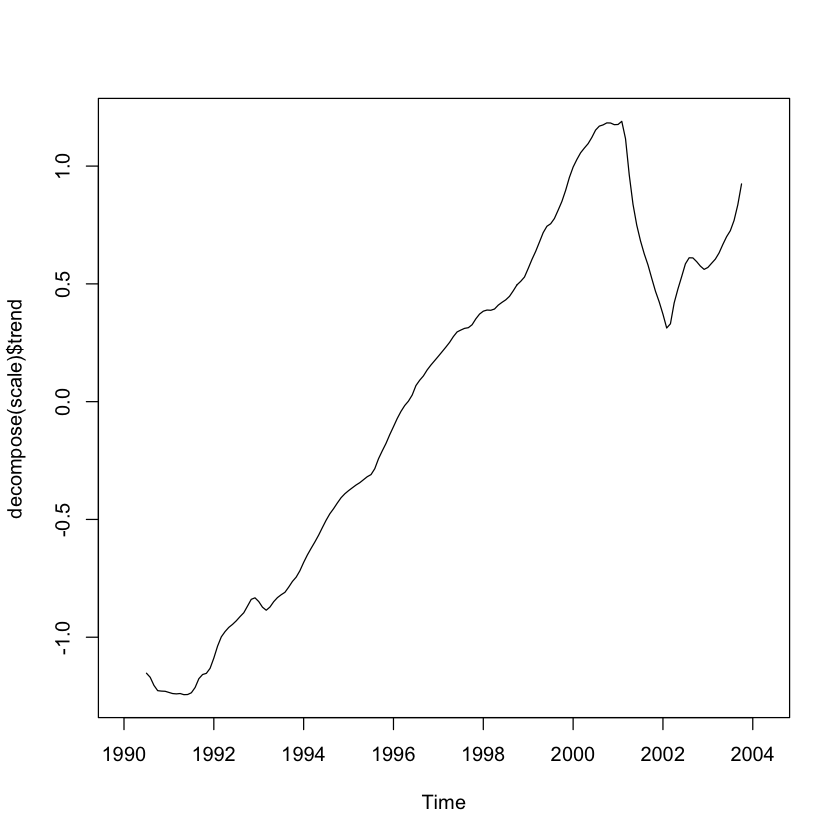

In [157]:
plot(decompose(scale)$trend)